# Module 7: Machine Learning Project Notebook
- Author: Matthew Block
- [GitHub Project Repository](https://github.com/matthewpblock/datafun-07-ml)

In [198]:
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

## Part 1 - Chart a Straight Line
Follow the instructions from 10.16 (starting page 414).

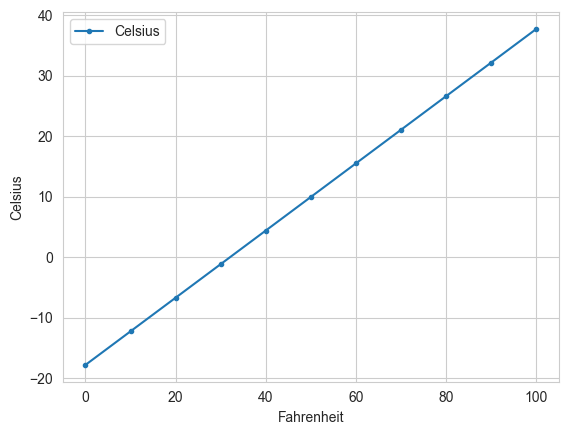

In [199]:
# Define the mathematical function
c = lambda f: 5/9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

# Graph the function
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition




In [200]:
# Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.
# Recommended: Rather than nyc, name the dataframe nyc_df to reinforce the DataFrame operations.

# Load the data
nyc_df = pd.read_csv('ch10/ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection 


In [201]:
print(nyc_df.head())
print(nyc_df.tail())

print(nyc_df.Date.dtype)

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3
int64


### Section 3 - Data Cleaning


In [202]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
print(nyc_df.head())

     Date  Temperature  Anomaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9
3  189801         39.6      2.2
4  189901         36.4     -1.0


In [203]:
nyc_df.Date = nyc_df.Date.floordiv(100)
print(nyc_df.head())

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9
3  1898         39.6      2.2
4  1899         36.4     -1.0


### Section 4 - Descriptive Statistics 


In [204]:
pd.set_option('display.precision', 2)
print(nyc_df.describe())

          Date  Temperature  Anomaly
count   124.00       124.00   124.00
mean   1956.50        37.60     0.20
std      35.94         4.54     4.54
min    1895.00        26.10   -11.30
25%    1925.75        34.58    -2.82
50%    1956.50        37.60     0.20
75%    1987.25        40.60     3.20
max    2018.00        47.60    10.20


### Section 5 - Build the Model 

In [205]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
print(linear_regression.slope)
print(linear_regression.intercept)

0.014771361132966163
8.694993233674289


### Section 6 - Predict 

In [206]:
slope = linear_regression.slope
intercept = linear_regression.intercept

print (f'Predicted average temp for Jan 2024: {slope * 2024 + intercept} F')

Predicted average temp for Jan 2024: 38.5922281667978 F


### Section 7 - Visualizations 

(0.0, 70.0)

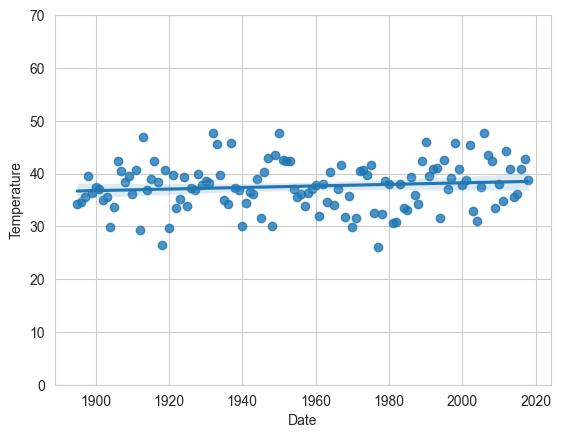

In [207]:
sns.set_style("whitegrid")
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(0, 70)

## Part 3 - Prediction
### Section 1 - Build the Model 

In [208]:
# Use test_train_split to split the data into parts for training and testing.
X_train, X_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)
# Check the shape of each data set.
print(X_train.shape, X_test.shape)


(93, 1) (31, 1)


In [209]:
# Train the model using Linear Regression Fit. 
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print(linear_regression.coef_)
print(linear_regression.intercept_)

[0.01939167]
-0.30779820252656975


### Section 2 - Test the Model 

In [210]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict  

In [211]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations 

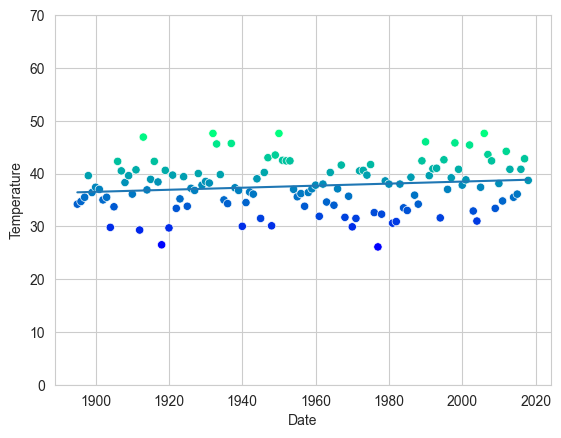

In [212]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(0, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

line = plt.plot(x, y)
plt.show()

## Part 4 - Insights
While the answers for the regression (and therfore the predictions) were close between the two methods, they were not identical. Further analysis could be done to determin which is the better fit.

## Part 5 - Bonus


In [223]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [224]:
print(california.data.shape)
print(california.target.shape)
print(california.feature_names)

(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [225]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)
print(california_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0    8.33      41.0      6.98       1.02       322.0      2.56     37.88   
1    8.30      21.0      6.24       0.97      2401.0      2.11     37.86   
2    7.26      52.0      8.29       1.07       496.0      2.80     37.85   
3    5.64      52.0      5.82       1.07       558.0      2.55     37.85   
4    3.85      52.0      6.28       1.08       565.0      2.18     37.85   

   Longitude  MedHouseValue  
0    -122.23           4.53  
1    -122.22           3.58  
2    -122.24           3.52  
3    -122.25           3.41  
4    -122.25           3.42  


In [226]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


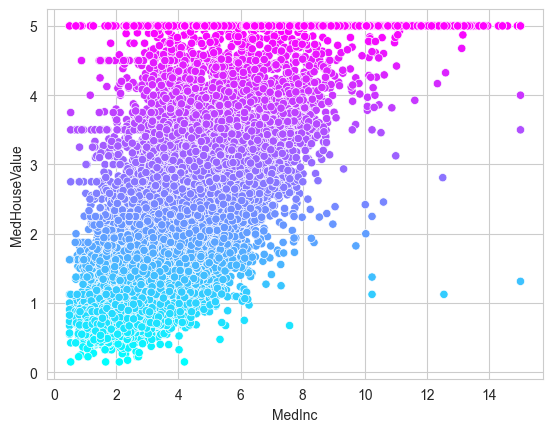

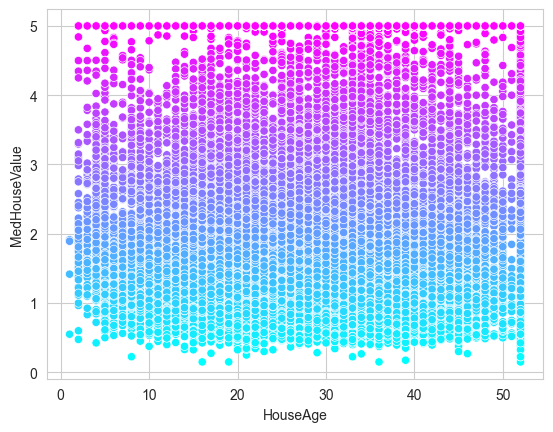

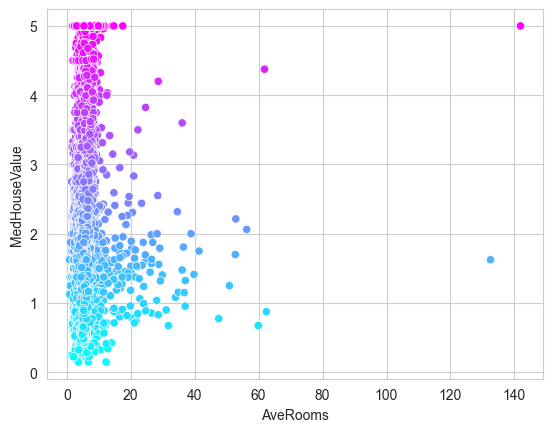

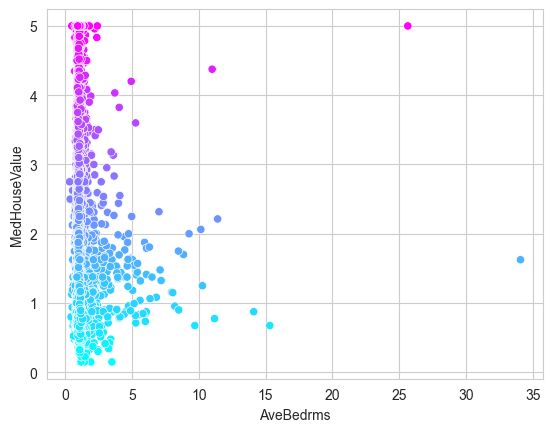

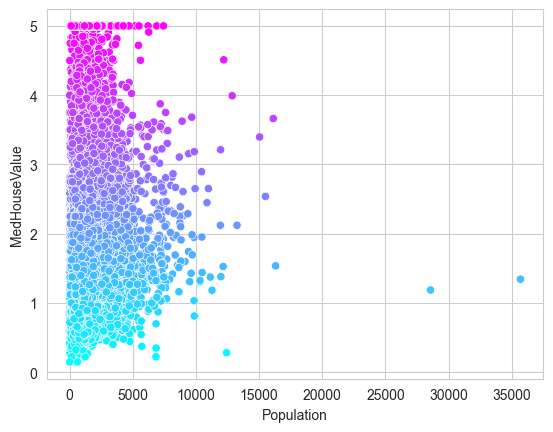

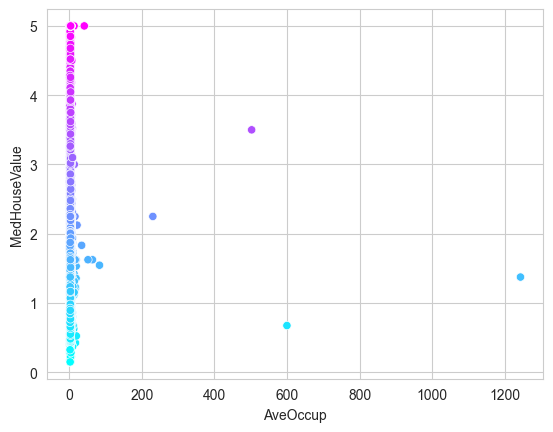

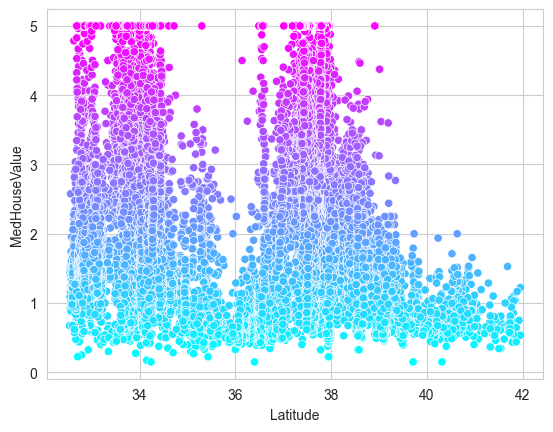

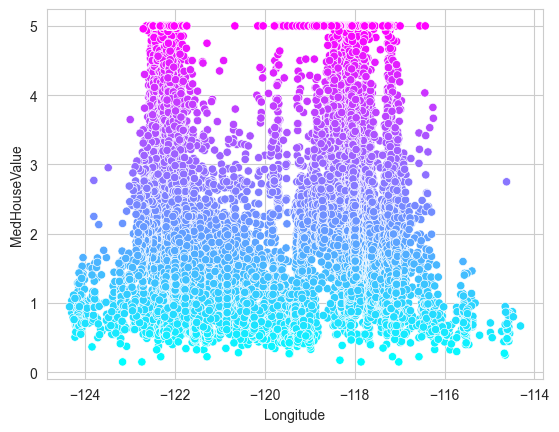

In [227]:
sns.set_style('whitegrid')
for feature in california.feature_names:
    sns.scatterplot(data=california_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='cool', legend=False)
    plt.show()

### Splitting Training v Test Data

In [228]:
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=11)

print(X_train.shape, X_test.shape)

(15480, 8) (5160, 8)


### Training the Model

In [229]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(california.feature_names):
    print(f'{name}: {linear_regression.coef_[i]}')
    
print(linear_regression.intercept_)

MedInc: 0.4377030215382202
HouseAge: 0.009216834565797943
AveRooms: -0.10732526637360937
AveBedrms: 0.6117133073918071
Population: -5.756822009279211e-06
AveOccup: -0.003384566465716355
Latitude: -0.4194818609649065
Longitude: -0.4337713349874012
-36.88295065605548


### Testing the Model

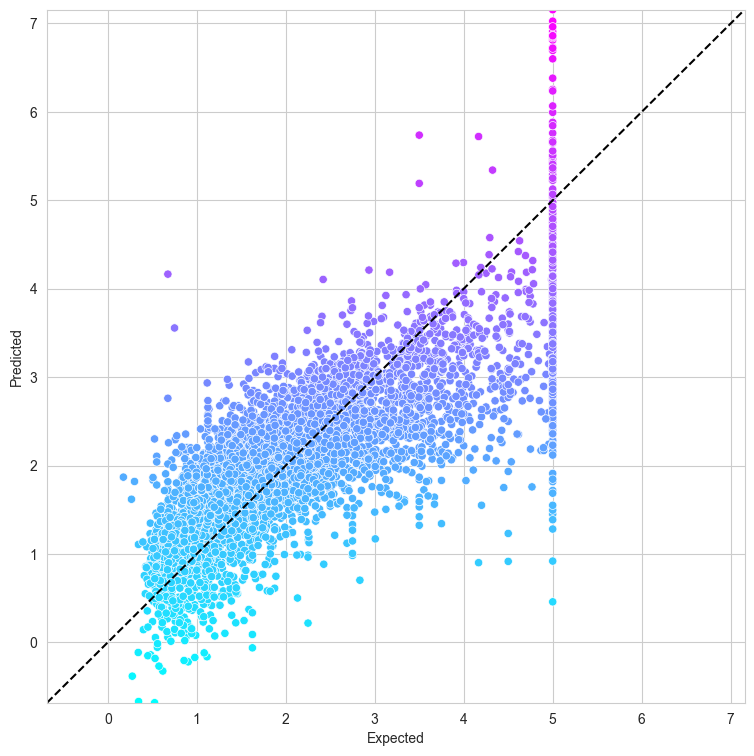

In [230]:
predicted = linear_regression.predict(X_test)
expected = y_test

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')
plt.show()

In [231]:
print(f'Coefficent of determination: {metrics.r2_score(expected, predicted)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(expected, predicted)}')

Coefficent of determination: 0.6008983115964333
Mean Squared Error: 0.5350149774449118


### Choosing the Best Model

In [232]:
estimators = {'Lasso': Lasso(), 'Ridge': Ridge(), 'ElasticNet': ElasticNet(), 'LinearRegression': LinearRegression()}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of R^2: {scores.mean():.3f}; ')

           Lasso: mean of R^2: 0.285; 
           Ridge: mean of R^2: 0.599; 
      ElasticNet: mean of R^2: 0.423; 
LinearRegression: mean of R^2: 0.599; 


### Final Insights
Seeing linear regression run across eight different dimensions at once is a great example of how machine learning algorithms can improve preciction modeling.  
The next step I'm looking to play with before the next course starts is to use dimensionality reduction to group similar features together before running the regression model. For instance, this dataset could be reduced to geographical features (Latitude, Longitude), demographic features (MedInc, Population, AveOccup, MedHouseValue), and house characteristics (HouseAge, AveRooms, AveBedrms). It would be interesting to see how this impacts the results.